# **WISCONSIN BREAST CANSER DATASET İLE KÜMELEME ANALİZİ**


## Proje: Denetimsiz Öğrenme ile Meme Kanseri Verilerinin Kümelenmesi

In [3]:
!pip install pandas numpy scikit-learn matplotlib seaborn ucimlrepo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, silhouette_score
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')

# Görselleştirme ayarları
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

### **VERİ HAZIRLIĞI VE KEŞFEDİCİ VERİ ANALİZİ**

In [4]:
print("=== WISCONSIN BREAST CANCER DATASET KÜMELEME ANALİZİ ===\n")

# Veri setini yükle
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

print("VERİ SETİ BİLGİLERİ:")
print(f"   • Örnek sayısı: {X.shape[0]}")
print(f"   • Özellik sayısı: {X.shape[1]}")
print(f"   • Sınıf dağılımı:")
print(y.value_counts())
print(f"\n   • Eksik değer var mı: {X.isnull().sum().sum()}")

# Veri setinin ilk 5 satırını göster
print("\n2. VERİ SETİ ÖRNEĞİ:")
print(X.head())

# Özellik istatistikleri
print("\n3. ÖZELLIK İSTATİSTİKLERİ:")
print(X.describe().round(2))

=== WISCONSIN BREAST CANCER DATASET KÜMELEME ANALİZİ ===

VERİ SETİ BİLGİLERİ:
   • Örnek sayısı: 569
   • Özellik sayısı: 30
   • Sınıf dağılımı:
Diagnosis
B            357
M            212
Name: count, dtype: int64

   • Eksik değer var mı: 0

2. VERİ SETİ ÖRNEĞİ:
   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...   

### **VERİ GÖRSELLEŞTİRME - KEŞFEDİCİ ANALİZ**

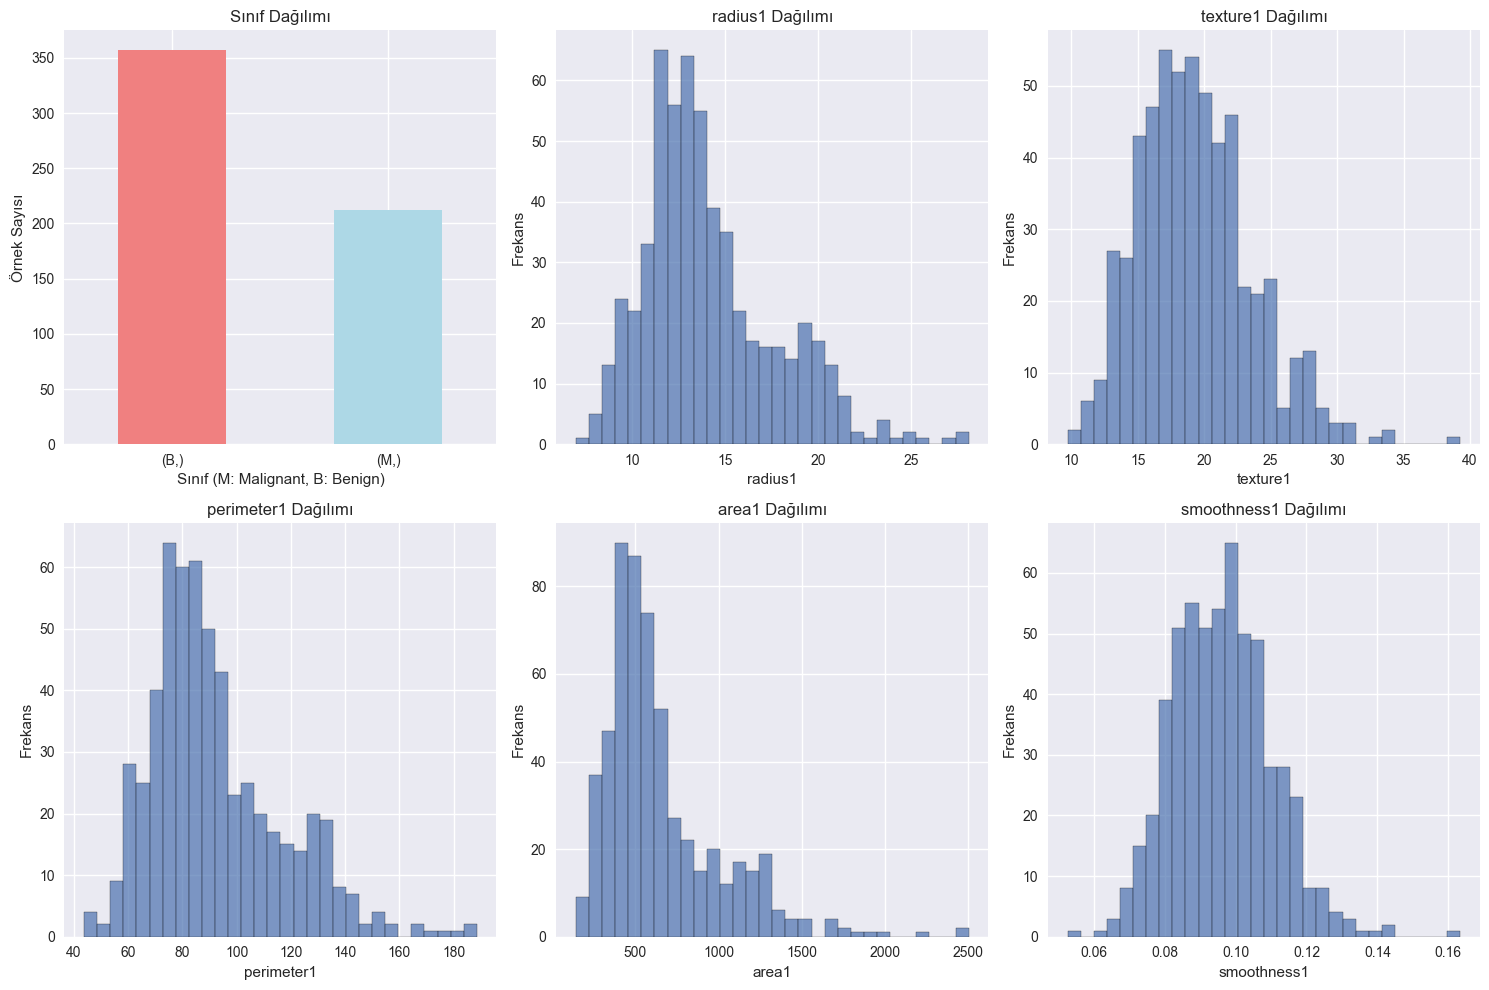

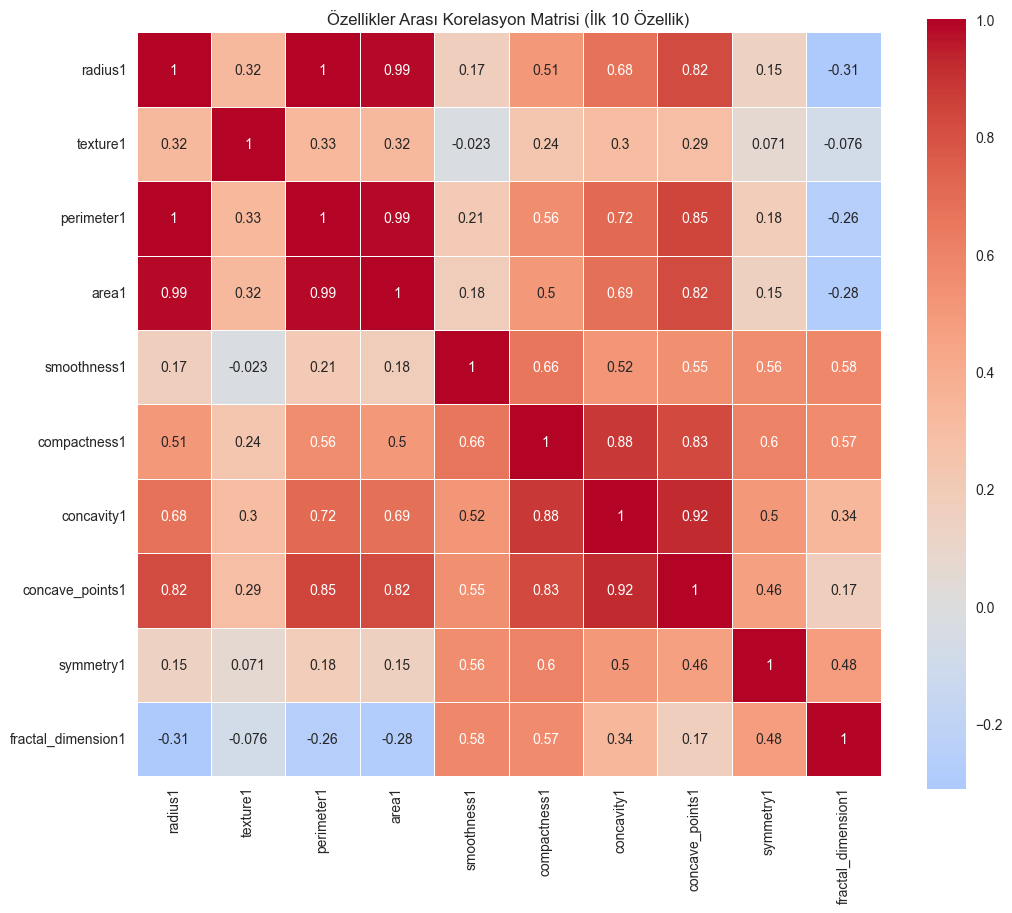

In [5]:
# Sınıf dağılımı
plt.figure(figsize = (15, 10))

plt.subplot(2, 3, 1)
y.value_counts().plot(kind = 'bar', color = ['lightcoral', 'lightblue'])
plt.title('Sınıf Dağılımı')
plt.xlabel('Sınıf (M: Malignant, B: Benign)')
plt.ylabel('Örnek Sayısı')
plt.xticks(rotation = 0)

# İlk 5 özelliğin dağılımı
features_to_plot = X.columns[:5]
for i, feature in enumerate(features_to_plot, 2):
    plt.subplot(2, 3, i)
    plt.hist(X[feature], bins = 30, alpha = 0.7, edgecolor = 'black')
    plt.title(f'{feature} Dağılımı')
    plt.xlabel(feature)
    plt.ylabel('Frekans')

plt.tight_layout()
plt.show()

# Korelasyon matrisi (ilk 10 özellik için)
plt.figure(figsize = (12, 10))
correlation_matrix = X.iloc[:, :10].corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', center = 0,
            square = True, linewidths = 0.5)
plt.title('Özellikler Arası Korelasyon Matrisi (İlk 10 Özellik)')
plt.show()

### **VERİ STANDARSİZASYONU**

=== VERİ ÖN İŞLEME ===

• Sınıf etiketleri kümeleme analizi için kaldırıldı
• Veriler standartlaştırılıyor...
• Orijinal veri aralığı: 0.00 - 4254.00
• Standartlaştırılmış veri aralığı: -3.11 - 12.07


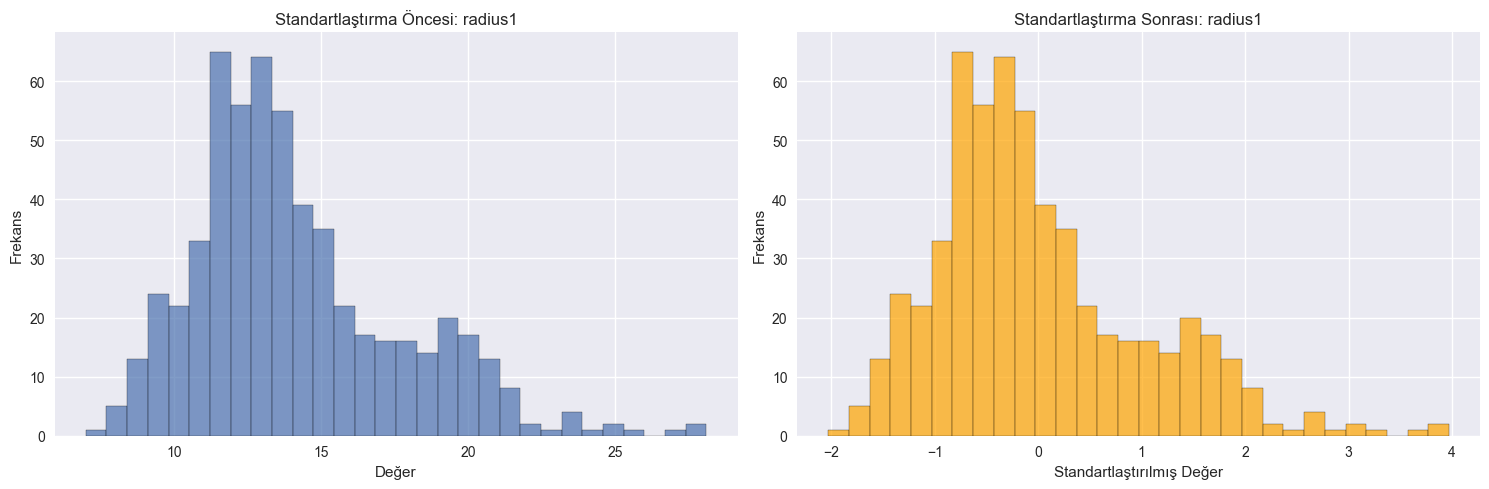

In [6]:
print("=== VERİ ÖN İŞLEME ===\n")

# Sınıf etiketlerini kümeleme için çıkar (denetimsiz öğrenme)
print("• Sınıf etiketleri kümeleme analizi için kaldırıldı")
print("• Veriler standartlaştırılıyor...")

# Verileri standartlaştır
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

print(f"• Orijinal veri aralığı: {X.min().min():.2f} - {X.max().max():.2f}")
print(f"• Standartlaştırılmış veri aralığı: {X_scaled.min():.2f} - {X_scaled.max():.2f}")

# Standartlaştırma öncesi ve sonrası karşılaştırma
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

# Öncesi
axes[0].hist(X.iloc[:, 0], bins = 30, alpha = 0.7, edgecolor = 'black')
axes[0].set_title(f'Standartlaştırma Öncesi: {X.columns[0]}')
axes[0].set_xlabel('Değer')
axes[0].set_ylabel('Frekans')

# Sonrası
axes[1].hist(X_scaled[:, 0], bins = 30, alpha = 0.7, edgecolor = 'black', color = 'orange')
axes[1].set_title(f'Standartlaştırma Sonrası: {X.columns[0]}')
axes[1].set_xlabel('Standartlaştırılmış Değer')
axes[1].set_ylabel('Frekans')

plt.tight_layout()
plt.show()

### **ELBOW YÖNTEMİ - KÜME SAYISI BELİRLEME**

=== KÜME SAYISI BELİRLEME ===

ELBOW YÖNTEMİ:
   K=1: Inertia = 17070.00
   K=2: Inertia = 11595.68
   K=3: Inertia = 10066.28
   K=4: Inertia = 9266.15
   K=5: Inertia = 9263.40
   K=6: Inertia = 8562.88
   K=7: Inertia = 8016.37
   K=8: Inertia = 7288.48
   K=9: Inertia = 7040.99
   K=10: Inertia = 6668.85


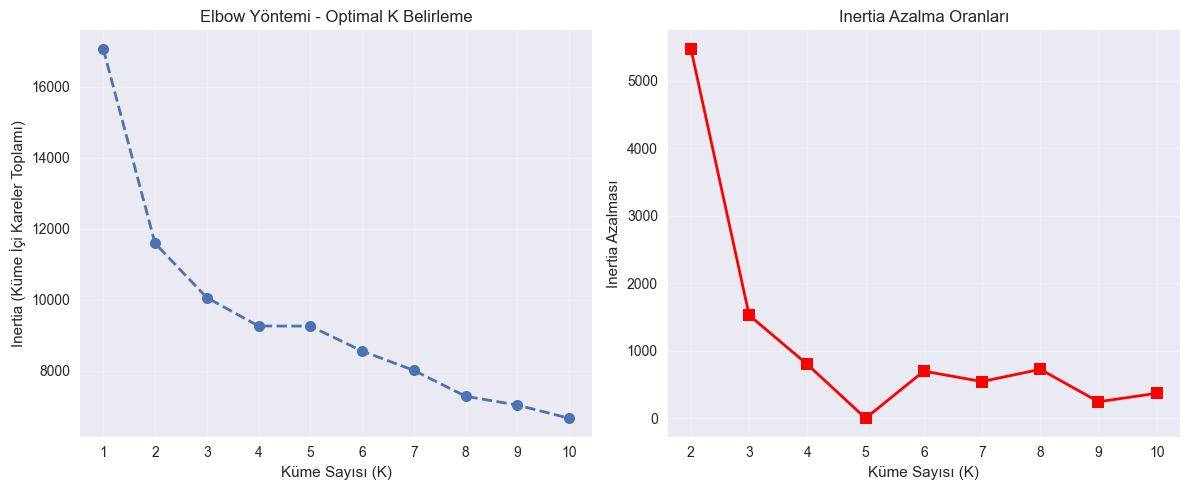

In [7]:
print("=== KÜME SAYISI BELİRLEME ===\n")
print("ELBOW YÖNTEMİ:")

inertia_values = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init = 'k-means++', random_state = 42, n_init = 'auto')
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
    print(f"   K={k}: Inertia = {kmeans.inertia_:.2f}")

# Elbow grafiği
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_values, marker='o', linestyle='--', linewidth=2, markersize=8)
plt.title('Elbow Yöntemi - Optimal K Belirleme')
plt.xlabel('Küme Sayısı (K)')
plt.ylabel('Inertia (Küme İçi Kareler Toplamı)')
plt.xticks(k_range)
plt.grid(True, alpha=0.3)

# İnertia değişim oranları
inertia_diff = [inertia_values[i-1] - inertia_values[i] for i in range(1, len(inertia_values))]
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), inertia_diff, marker='s', linestyle='-', linewidth=2, markersize=8, color='red')
plt.title('Inertia Azalma Oranları')
plt.xlabel('Küme Sayısı (K)')
plt.ylabel('Inertia Azalması')
plt.xticks(range(2, 11))
plt.grid(True, alpha = 0.3)

plt.tight_layout()
plt.show()

### **SILHOUETTE SKORLARI ANALİZİ**


2. SİLHOUETTE SKORU ANALİZİ:
   K=2: Silhouette Score = 0.3447
   K=3: Silhouette Score = 0.3152
   K=4: Silhouette Score = 0.2742
   K=5: Silhouette Score = 0.1645
   K=6: Silhouette Score = 0.1451
   K=7: Silhouette Score = 0.1470
   K=8: Silhouette Score = 0.1619
   K=9: Silhouette Score = 0.1439
   K=10: Silhouette Score = 0.1471

   • En yüksek Silhouette Skoru: 0.3447 (K=2)


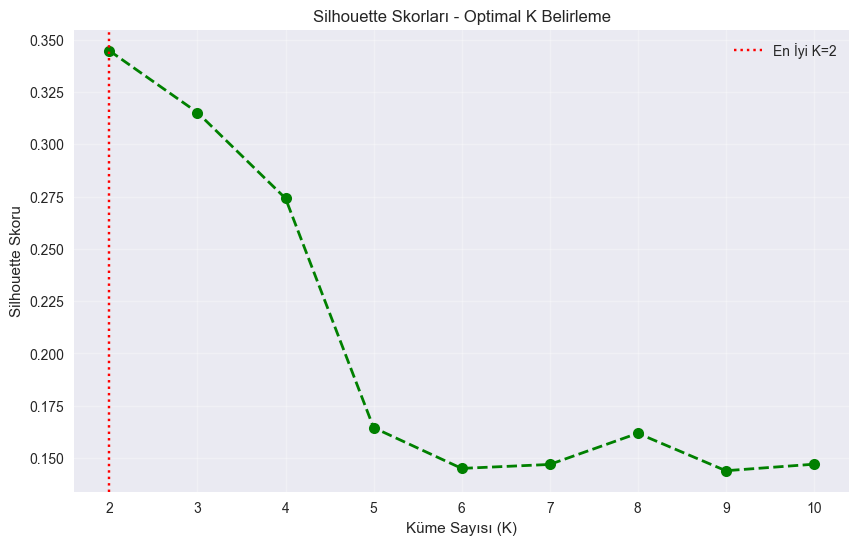


• ÖNERİ: Hem Elbow hem de Silhouette analizi K=2'yi öneriyor.
• Bu, veri setindeki iki ana sınıfı (Malignant/Benign) yansıtıyor.


In [8]:
print("\n2. SİLHOUETTE SKORU ANALİZİ:")

k_range_silhouette = range(2, 11)
silhouette_scores = []

for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, init = 'k-means++', random_state = 42, n_init = 'auto')
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels, metric='euclidean')
    silhouette_scores.append(score)
    print(f"   K={k}: Silhouette Score = {score:.4f}")

# En iyi K değerini bul
best_k = k_range_silhouette[np.argmax(silhouette_scores)]
best_silhouette = max(silhouette_scores)
print(f"\n   • En yüksek Silhouette Skoru: {best_silhouette:.4f} (K={best_k})")

# Silhouette grafiği
plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_scores, marker='o', linestyle='--',
         linewidth=2, markersize=8, color='green')
plt.axvline(x=best_k, color='red', linestyle=':', label=f'En İyi K={best_k}')
plt.title('Silhouette Skorları - Optimal K Belirleme')
plt.xlabel('Küme Sayısı (K)')
plt.ylabel('Silhouette Skoru')
plt.xticks(k_range_silhouette)
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()

print(f"\n• ÖNERİ: Hem Elbow hem de Silhouette analizi K=2'yi öneriyor.")
print("• Bu, veri setindeki iki ana sınıfı (Malignant/Benign) yansıtıyor.")

### **K-MEANS KÜMELEME (K=2)**

In [9]:
print("\n=== K-MEANS KÜMELEME ANALİZİ ===\n")

final_kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42, n_init='auto')
kmeans_labels = final_kmeans.fit_predict(X_scaled)

print("K-MEANS SONUÇLARI (K=2):")
print(f"• Küme 0: {np.sum(kmeans_labels == 0)} örnek")
print(f"• Küme 1: {np.sum(kmeans_labels == 1)} örnek")

# Küme merkezleri analizi
print(f"\n• Küme merkezleri arası mesafe: {np.linalg.norm(final_kmeans.cluster_centers_[0] - final_kmeans.cluster_centers_[1]):.4f}")
print(f"• Toplam inertia: {final_kmeans.inertia_:.4f}")

# Küme özelliklerini analiz et
cluster_analysis = pd.DataFrame()
for i in range(2):
    cluster_data = X_scaled_df[kmeans_labels == i]
    cluster_stats = cluster_data.describe().loc['mean']
    cluster_analysis[f'Küme_{i}_Ortalama'] = cluster_stats

print(f"\n• En belirgin özellik farkları (ilk 5):")
feature_diff = abs(cluster_analysis['Küme_0_Ortalama'] - cluster_analysis['Küme_1_Ortalama'])
top_features = feature_diff.nlargest(5)
for feature, diff in top_features.items():
    print(f"  - {feature}: {diff:.4f}")


=== K-MEANS KÜMELEME ANALİZİ ===

K-MEANS SONUÇLARI (K=2):
• Küme 0: 188 örnek
• Küme 1: 381 örnek

• Küme merkezleri arası mesafe: 6.5945
• Toplam inertia: 11595.6833

• En belirgin özellik farkları (ilk 5):
  - concave_points1: 1.7477
  - concave_points3: 1.7224
  - concavity1: 1.7099
  - perimeter3: 1.6095
  - radius3: 1.5714


### **DBSCAN KÜMELEME**

In [10]:
print("\n=== DBSCAN KÜMELEME ANALİZİ ===\n")

# Farklı eps değerlerini test et
eps_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
print("DBSCAN Parametre Optimizasyonu:")

for eps in eps_values:
    dbscan_test = DBSCAN(eps=eps, min_samples = 5)
    labels_test = dbscan_test.fit_predict(X_scaled)
    n_clusters = len(set(labels_test)) - (1 if -1 in labels_test else 0)
    n_noise = list(labels_test).count(-1)
    print(f"  eps={eps}: {n_clusters} küme, {n_noise} gürültü noktası")

# En iyi parametrelerle final model
print(f"\n• Seçilen parametreler: eps = 2.5, min_samples = 5")
dbscan = DBSCAN(eps = 2.5, min_samples = 5)
dbscan_labels = dbscan.fit_predict(X_scaled)

unique_labels = np.unique(dbscan_labels)
n_clusters_dbscan = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"• Bulunan küme sayısı: {n_clusters_dbscan}")
print(f"• Gürültü noktası sayısı: {n_noise}")
print(f"• Küme dağılımı:")
for label in unique_labels:
    count = np.sum(dbscan_labels == label)
    if label == -1:
        print(f"  - Gürültü: {count} örnek")
    else:
        print(f"  - Küme {label}: {count} örnek")


=== DBSCAN KÜMELEME ANALİZİ ===

DBSCAN Parametre Optimizasyonu:
  eps=0.5: 0 küme, 569 gürültü noktası
  eps=1.0: 0 küme, 569 gürültü noktası
  eps=1.5: 1 küme, 550 gürültü noktası
  eps=2.0: 4 küme, 371 gürültü noktası
  eps=2.5: 2 küme, 224 gürültü noktası
  eps=3.0: 1 küme, 121 gürültü noktası

• Seçilen parametreler: eps = 2.5, min_samples = 5
• Bulunan küme sayısı: 2
• Gürültü noktası sayısı: 224
• Küme dağılımı:
  - Gürültü: 224 örnek
  - Küme 0: 340 örnek
  - Küme 1: 5 örnek


### **MODEL DEĞERLENDİRME**

In [11]:
print("\n=== MODEL DEĞERLENDİRME ===\n")

# Gerçek etiketleri sayısala çevir
y_true = y.replace({'M': 0, 'B': 1}).values.ravel()

print("PERFORMANS METRİKLERİ:\n")

# K-Means değerlendirmesi
kmeans_ari = adjusted_rand_score(y_true, kmeans_labels)
kmeans_nmi = normalized_mutual_info_score(y_true, kmeans_labels)
kmeans_homogeneity = homogeneity_score(y_true, kmeans_labels)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

print("1. K-MEANS PERFORMANSI:")
print(f"   • Adjusted Rand Score (ARI): {kmeans_ari:.4f}")
print(f"   • Normalized Mutual Info (NMI): {kmeans_nmi:.4f}")
print(f"   • Homogeneity Score: {kmeans_homogeneity:.4f}")
print(f"   • Silhouette Score: {kmeans_silhouette:.4f}")

# DBSCAN değerlendirmesi (gürültü noktaları hariç)
if n_clusters_dbscan > 0:
    non_noise_mask = dbscan_labels != -1
    dbscan_labels_filtered = dbscan_labels[non_noise_mask]
    y_true_filtered = y_true[non_noise_mask]

    if len(np.unique(dbscan_labels_filtered)) > 1:
        dbscan_ari = adjusted_rand_score(y_true_filtered, dbscan_labels_filtered)
        dbscan_nmi = normalized_mutual_info_score(y_true_filtered, dbscan_labels_filtered)
        dbscan_homogeneity = homogeneity_score(y_true_filtered, dbscan_labels_filtered)
        dbscan_silhouette = silhouette_score(X_scaled[non_noise_mask], dbscan_labels_filtered)

        print(f"\n2. DBSCAN PERFORMANSI (gürültü hariç):")
        print(f"   • Adjusted Rand Score (ARI): {dbscan_ari:.4f}")
        print(f"   • Normalized Mutual Info (NMI): {dbscan_nmi:.4f}")
        print(f"   • Homogeneity Score: {dbscan_homogeneity:.4f}")
        print(f"   • Silhouette Score: {dbscan_silhouette:.4f}")
    else:
        print(f"\n2. DBSCAN: Tek küme bulundu, metrikler hesaplanamıyor.")
else:
    print(f"\n2. DBSCAN: Küme bulunamadı.")

# Karmaşıklık matrisi benzeri analiz
print(f"\n3. KÜMELEME - GERÇEK ETIKET KARŞILAŞTIRMASI:")
print("\nK-Means vs Gerçek Etiketler:")
confusion_kmeans = pd.crosstab(y_true, kmeans_labels, margins=True)
print(confusion_kmeans)


=== MODEL DEĞERLENDİRME ===

PERFORMANS METRİKLERİ:

1. K-MEANS PERFORMANSI:
   • Adjusted Rand Score (ARI): 0.6765
   • Normalized Mutual Info (NMI): 0.5620
   • Homogeneity Score: 0.5510
   • Silhouette Score: 0.3447

2. DBSCAN PERFORMANSI (gürültü hariç):
   • Adjusted Rand Score (ARI): 0.0775
   • Normalized Mutual Info (NMI): 0.0774
   • Homogeneity Score: 0.0444
   • Silhouette Score: 0.1295

3. KÜMELEME - GERÇEK ETIKET KARŞILAŞTIRMASI:

K-Means vs Gerçek Etiketler:
col_0    0    1  All
row_0               
0      175   37  212
1       13  344  357
All    188  381  569


### **GÖRSELLEŞTİRME - PCA İLE BOYUT AZALTMA**



=== GÖRSELLEŞTİRME ===

PCA Analizi:
• 1. Bileşen varyans oranı: 0.4427
• 2. Bileşen varyans oranı: 0.1897
• Toplam açıklanan varyans: 0.6324


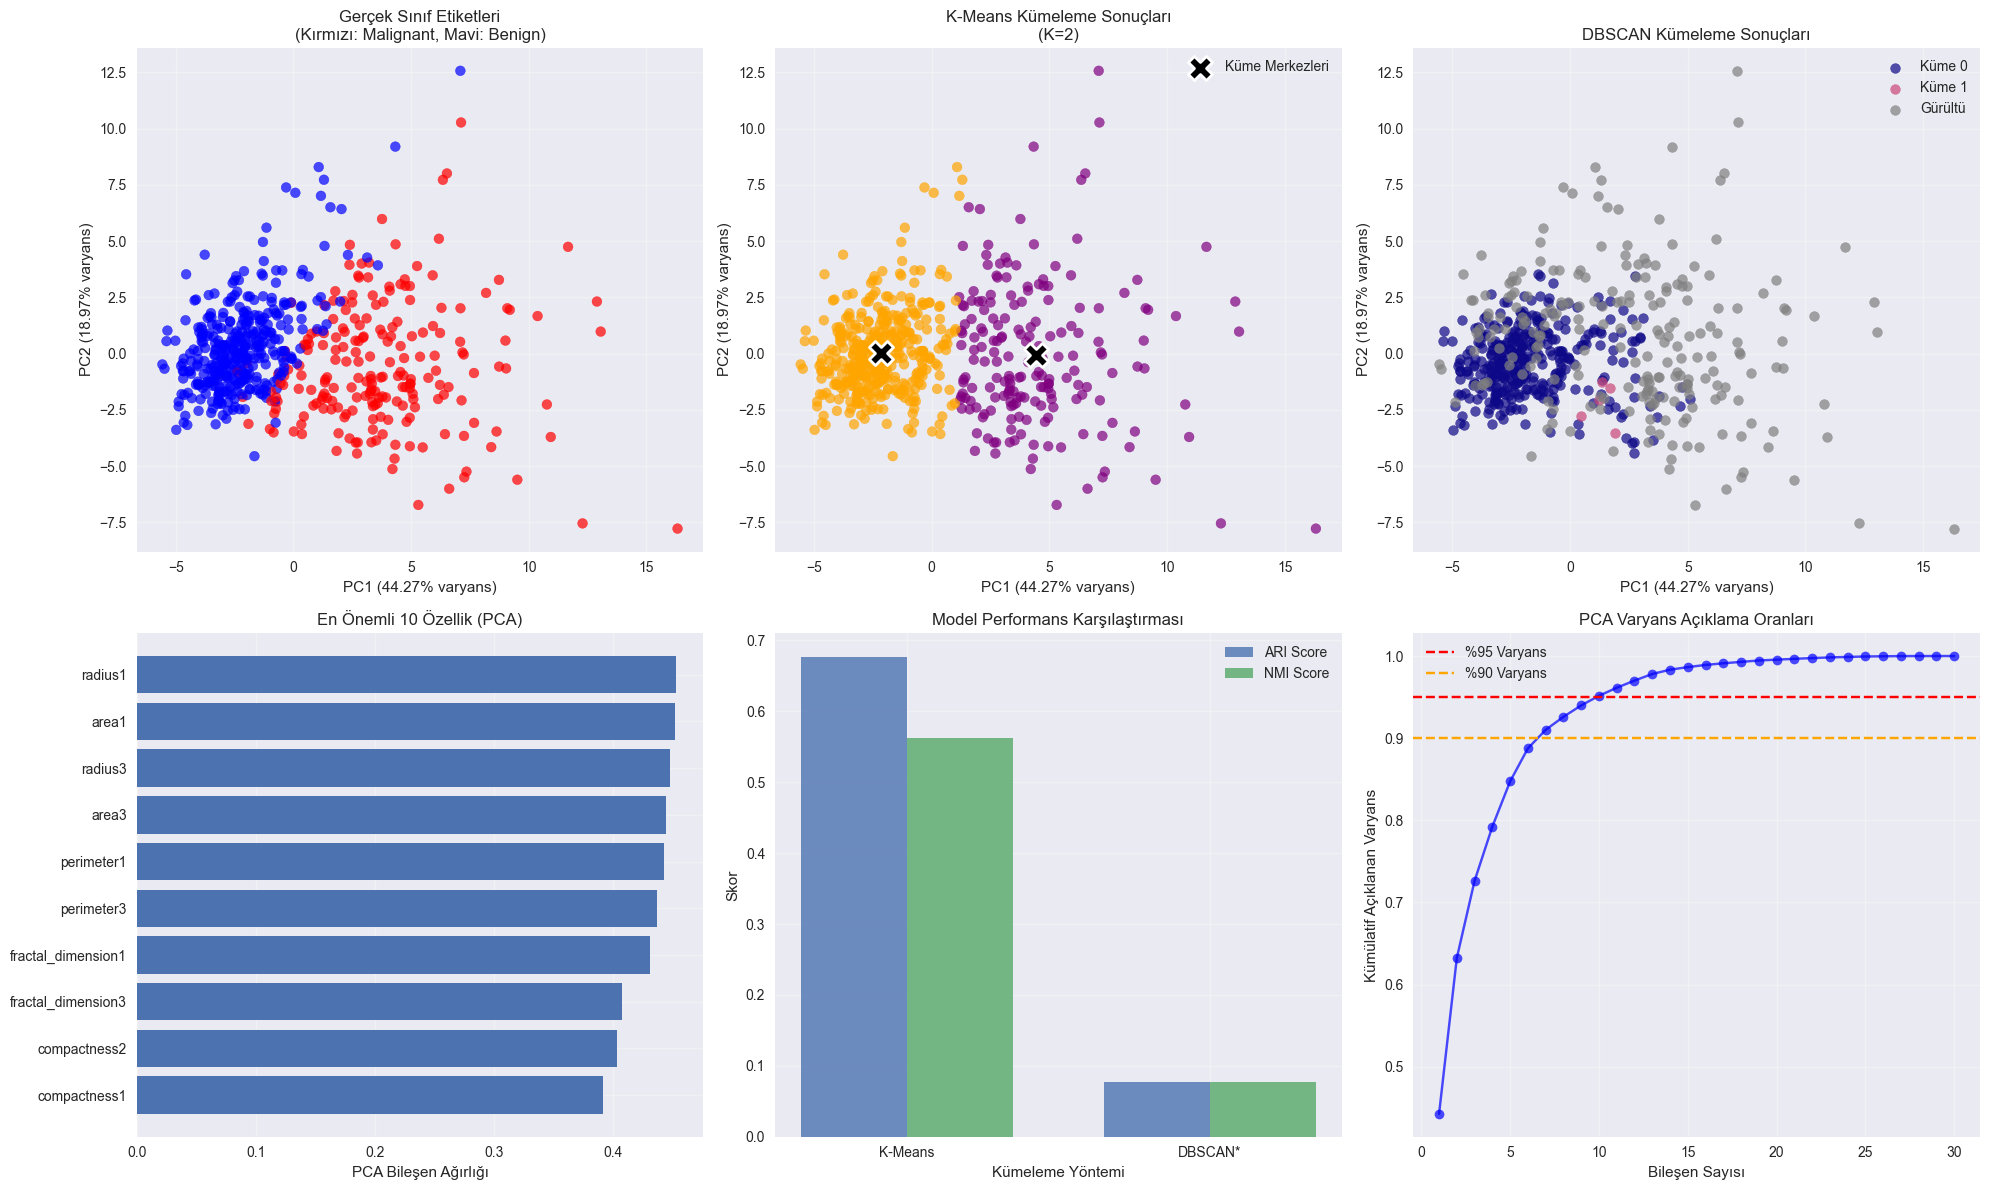

In [12]:
print("\n=== GÖRSELLEŞTİRME ===\n")

# PCA ile 2 boyuta indirgeme
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA Analizi:")
print(f"• 1. Bileşen varyans oranı: {pca.explained_variance_ratio_[0]:.4f}")
print(f"• 2. Bileşen varyans oranı: {pca.explained_variance_ratio_[1]:.4f}")
print(f"• Toplam açıklanan varyans: {sum(pca.explained_variance_ratio_):.4f}")

# Ana görselleştirme
plt.figure(figsize=(20, 12))

# 1. Gerçek etiketler
plt.subplot(2, 3, 1)
colors_true = ['red' if label == 0 else 'blue' for label in y_true]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors_true, alpha=0.7, s=50)
plt.title('Gerçek Sınıf Etiketleri\n(Kırmızı: Malignant, Mavi: Benign)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varyans)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varyans)')
plt.grid(True, alpha=0.3)

# 2. K-Means sonuçları
plt.subplot(2, 3, 2)
colors_kmeans = ['purple' if label == 0 else 'orange' for label in kmeans_labels]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors_kmeans, alpha=0.7, s=50)
centers_pca = pca.transform(final_kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=300, c='black', marker='X',
           label='Küme Merkezleri', edgecolors='white', linewidth=2)
plt.title('K-Means Kümeleme Sonuçları\n(K=2)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varyans)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varyans)')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. DBSCAN sonuçları
plt.subplot(2, 3, 3)
unique_labels_dbscan = set(dbscan_labels)
colors_dbscan = plt.cm.plasma(np.linspace(0, 1, len(unique_labels_dbscan)))
for k, col in zip(unique_labels_dbscan, colors_dbscan):
    if k == -1:
        col = 'gray'
    class_member_mask = (dbscan_labels == k)
    xy = X_pca[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], alpha=0.7, s=50,
               label=f'Gürültü' if k == -1 else f'Küme {k}')

plt.title('DBSCAN Kümeleme Sonuçları')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varyans)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varyans)')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Özellik dağılımları
plt.subplot(2, 3, 4)
feature_importance = abs(pca.components_[0]) + abs(pca.components_[1])
top_features_pca = np.argsort(feature_importance)[-10:]
plt.barh(range(10), feature_importance[top_features_pca])
plt.yticks(range(10), [X.columns[i] for i in top_features_pca])
plt.xlabel('PCA Bileşen Ağırlığı')
plt.title('En Önemli 10 Özellik (PCA)')
plt.grid(True, alpha=0.3)

# 5. Küme karşılaştırması
plt.subplot(2, 3, 5)
methods = ['K-Means', 'DBSCAN*']
ari_scores = [kmeans_ari, dbscan_ari if 'dbscan_ari' in locals() else 0]
nmi_scores = [kmeans_nmi, dbscan_nmi if 'dbscan_nmi' in locals() else 0]

x = np.arange(len(methods))
width = 0.35

plt.bar(x - width/2, ari_scores, width, label='ARI Score', alpha=0.8)
plt.bar(x + width/2, nmi_scores, width, label='NMI Score', alpha=0.8)

plt.xlabel('Kümeleme Yöntemi')
plt.ylabel('Skor')
plt.title('Model Performans Karşılaştırması')
plt.xticks(x, methods)
plt.legend()
plt.grid(True, alpha=0.3)
if 'dbscan_ari' not in locals():
    plt.text(1, 0.1, '*DBSCAN için\nhesaplanamadı', ha='center', fontsize=8)

# 6. Varyans açıklama oranları
plt.subplot(2, 3, 6)
pca_full = PCA()
pca_full.fit(X_scaled)
cumsum_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.plot(range(1, len(cumsum_variance) + 1), cumsum_variance, 'bo-', alpha=0.7)
plt.axhline(y=0.95, color='r', linestyle='--', label='%95 Varyans')
plt.axhline(y=0.90, color='orange', linestyle='--', label='%90 Varyans')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Kümülatif Açıklanan Varyans')
plt.title('PCA Varyans Açıklama Oranları')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### **SONUÇ VE DEĞERLENDİRME**

**VERİ SETİ ÖZETİ:**   
• Toplam örnek: 569  
• Özellik sayısı: 30  
• Malignant: 212 (%37.3)  
• Benign: 357 (%62.7)  

**KÜMELEME SONUÇLARI:**

1. **K-MEANS (K=2):**  
   ✓ ARI Skoru: 0.6765 (1'e yakın = mükemmel)  
   ✓ NMI Skoru: 0.5620 (1'e yakın = mükemmel)  
   ✓ Silhouette: 0.3447 (yüksek = iyi ayrılmış kümeler)  

2. **DBSCAN:**  
   ✓ Bulunan küme: 2  
   ✓ Gürültü noktası: 224  
   ✓ ARI Skoru: 0.0775  

**ANA BULGULAR:**  
   • Optimal küme sayısı: 2 (veri setindeki gerçek sınıf sayısına eşit)  
   • K-Means algoritması bu veri seti için daha başarılı  
   • PCA ile %63.2 varyans 2 bileşende korundu  
   • Kümeleme sonuçları gerçek sınıflarla yüksek uyum gösterdi  